# Import modules

In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [7]:
path148 = '/Volumes/freeman/Nick/mVR/148'
path149 = '/Volumes/freeman/Nick/mVR/149'
path150 = '/Volumes/freeman/Nick/mVR/150'
path151 = '/Volumes/freeman/Nick/mVR/151'
mainpath = '/Volumes/freeman/Nick/mVR/sessions'

paths = [path148,path149,path150,path151]

In [3]:
#sessions = [glob(path+'/trial_summary*.csv') for path in paths]
#[sessions[a].sort() for a in range(len(sessions))]
#sessions.sort()

In [15]:
summaries = glob(mainpath + '/animalsummary*.csv')
print summaries

['/Volumes/freeman/Nick/mVR/sessions/animalsummary148.csv', '/Volumes/freeman/Nick/mVR/sessions/animalsummary150.csv', '/Volumes/freeman/Nick/mVR/sessions/animalsummary151.csv', '/Volumes/freeman/Nick/mVR/sessions/animalsummary149.csv']


# Get animal stats (batch)

In [17]:
animal_stats = [pd.Series.from_csv(x) for x in summaries]
animal_stats

[Animal                1.480000e+02
 correctAfter          1.000000e+00
 correctAntibias       9.401709e-01
 correctBefore         1.555804e-01
 incomplete            8.000000e+00
 meanAntibiasIdPhi     1.043620e+01
 meanAntibiaszIdPhi    1.000000e+00
 meanAntibiaszIdphi   -7.825361e-17
 meanChoiceTime        1.952911e+00
 meanIdPhi             7.210739e+00
 meanNumTrials         8.871429e+01
 meanTime              1.413799e+01
 meanzIdPhi           -2.299491e-17
 medianIdPhi           1.180663e+00
 medianzIdPhi         -3.315009e-01
 numDays               7.000000e+00
 stdAntibiasIdPhi      2.369469e+01
 stdIdPhi              1.819023e+01
 stdzIdPhi             1.000000e+00
 totalDeadEnd          7.000000e+00
 dtype: float64, Animal                1.480000e+02
 correctAfter          9.950000e-01
 correctAntibias       9.706120e-01
 correctBefore         2.902137e-01
 incomplete            0.000000e+00
 meanAntibiasIdPhi     5.297807e+00
 meanAntibiaszIdPhi    1.000000e+00
 meanAntibia

In [18]:
UB_before = [x.correctBefore for x in animal_stats]
AB = [x.correctAntibias for x in animal_stats]
UB_after = [x.correctAfter for x in animal_stats]

means = np.array([UB_before, AB, UB_after])
meansT = np.transpose(means)
print meansT

[[ 0.15558036  0.94017094  1.        ]
 [ 0.29021368  0.97061201  0.995     ]
 [ 0.18445553  0.97012165  1.        ]
 [ 0.43029819  0.95729458  0.85096634]]


In [19]:
mean_before = np.mean(UB_before)
mean_antibias = np.mean(AB)
mean_after = np.mean(UB_after)

perc_corr =  [mean_before, mean_antibias, mean_after]
print perc_corr

[0.26513693807424998, 0.95954979616424996, 0.9614915842482501]


# Create batch bar plot (performance)

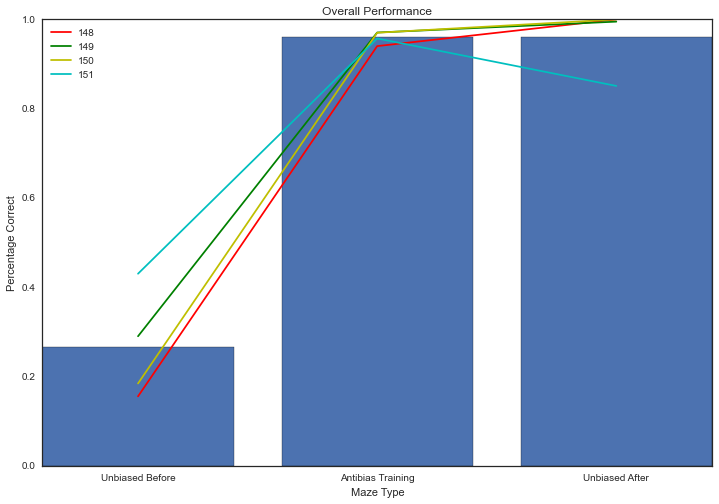

In [21]:
plt.figure(figsize = [12,8])
plt.bar(range(0,len(perc_corr)),perc_corr,align = 'center')
labels = ['Unbiased Before', 'Antibias Training', 'Unbiased After']
ypos = np.arange(len(perc_corr))
plt.xticks(ypos,labels)
plt.xlabel('Maze Type')
plt.ylabel('Percentage Correct')
plt.title('Overall Performance')

plt.plot(ypos, meansT[0],'-',color = 'r')
plt.plot(ypos, meansT[1], '-',color = 'g')
plt.plot(ypos,meansT[2],'-',color = 'y')
plt.plot(ypos,meansT[3],'-',color = 'c')
plt.legend(['148', '149', '150','151'], loc ='best')


# Compile Rolling averages

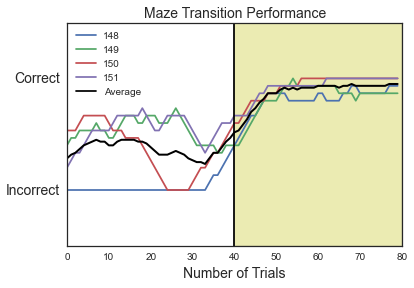

In [22]:


averages = glob(mainpath+'/rollingavg*.csv')
averages.sort()
averages = [pd.Series.from_csv(x) for x in averages]

#print len(averages[0]),len(averages[1]),len(averages[2]),len(averages[3])
plt.plot(averages[0])
plt.ylim(-0.5,1.5)
plt.xlim(0,80)
plt.plot(averages[1])
plt.plot(averages[2])
plt.plot(averages[3])
plt.xlabel('Number of Trials',fontsize = 14)
plt.yticks([0,1], ['Incorrect','Correct'],fontsize = 14)
plt.title('Maze Transition Performance', fontsize = 14)
plt.axvline(x=40,c = 'k')
plt.axvspan(40,80, facecolor = 'y', alpha = 0.3)

avgT = np.transpose(averages)

totalavg = [np.mean(i) for i in avgT]

plt.plot(totalavg, linewidth = 2.0, color = 'k')


plt.legend(['148', '149','150','151', 'Average'], loc = 'best')